## EDA(Exaploratory Data Analysis)


In [4]:
import pandas as pd

In [8]:
df = pd.read_csv("onion_2022.csv")

In [10]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,29/01/2022,4000.0,7000.0,5000.0
1,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,31/01/2022,4000.0,6000.0,5000.0
2,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,14/03/2022,4000.0,6000.0,5000.0
3,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,15/03/2022,4000.0,6000.0,5000.0
4,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,16/03/2022,4000.0,6000.0,5000.0


In [12]:
## Firstly lets check the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201924 entries, 0 to 201923
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   state         201924 non-null  object 
 1   district      201924 non-null  object 
 2   market        201924 non-null  object 
 3   commodity     201924 non-null  object 
 4   variety       201924 non-null  object 
 5   arrival_date  201924 non-null  object 
 6   min_price     201801 non-null  float64
 7   max_price     201494 non-null  float64
 8   modal_price   201924 non-null  float64
dtypes: float64(3), object(6)
memory usage: 13.9+ MB


HEre we can see the number of columns their name , there datatypes

In [17]:
#Descriptive summary
df.describe()

,min_price,max_price,modal_price
count,201801.000000,201494.000000,201924.000000
mean,1626.001554,2041.775284,1845.356867
std,1613.024647,1869.346724,1719.578318
min,4.000000,12.000000,6.000000
25%,1000.000000,1400.000000,1240.000000
50%,1410.000000,1775.000000,1570.000000
75%,2000.000000,2370.750000,2100.000000
max,100000.000000,105000.000000,102000.000000


here we get the parameters of descriptiove stats
like mean, median 25 percentile, 50th percentile, 75th percentile, min, max

In [20]:
# check the shape of the dataset
df.shape

(201924, 9)

Here number of (Rows,columns) are displayed

In [25]:
## displying columns
df.columns

Index(['state', 'district', 'market', 'commodity', 'variety', 'arrival_date',
       'min_price', 'max_price', 'modal_price'],
      dtype='object')

In [31]:
df['modal_price'].unique

array([5000., 4000., 1669., ..., 2935., 5350., 3375.])

In [33]:
df['modal_price'].value_counts()

modal_price
1500.0    10322
1200.0     8643
2000.0     8609
1800.0     8096
1400.0     7773
          ...  
2878.0        1
2913.0        1
2988.0        1
452.0         1
1223.0        1
Name: count, Length: 1938, dtype: int64

Here we can see most of the value count is for 1500 i.e mostly the onion rate was 1500
And the is also a imablanced data set as over values range differ a lot

In [37]:
# conlusion - Imbalanced dataset

In [39]:
## Missing values
df.isnull().sum()

state             0
district          0
market            0
commodity         0
variety           0
arrival_date      0
min_price       123
max_price       430
modal_price       0
dtype: int64

There are null values in min_price and max_price

conclusion - there are missing values in min_price and max_price
##### These are handles during feature Engineering

In [48]:
## Check Dublicate records
df[df.duplicated()].sum()

state             0
district          0
market            0
commodity         0
variety           0
arrival_date      0
min_price       0.0
max_price       0.0
modal_price     0.0
dtype: object

There are no duplicate records present

In [53]:
## If there were duplicate records we would have removed it during EDA 

In [ ]:
#3 Lets check the correlation
df.corr()



Here id we run this cell will get error because correlation can be checked only between numerical values

In [65]:
# LEts seperate the numerical values
df2 = df[['min_price','max_price','modal_price']]

In [67]:
df2.head()

,min_price,max_price,modal_price
0,4000.0,7000.0,5000.0
1,4000.0,6000.0,5000.0
2,4000.0,6000.0,5000.0
3,4000.0,6000.0,5000.0
4,4000.0,6000.0,5000.0


In [70]:

df2.corr()

,min_price,max_price,modal_price
min_price,1.000000,0.955678,0.983747
max_price,0.955678,1.000000,0.988396
modal_price,0.983747,0.988396,1.000000


In [72]:
# Here all are highly and positively correlated

<Axes: >

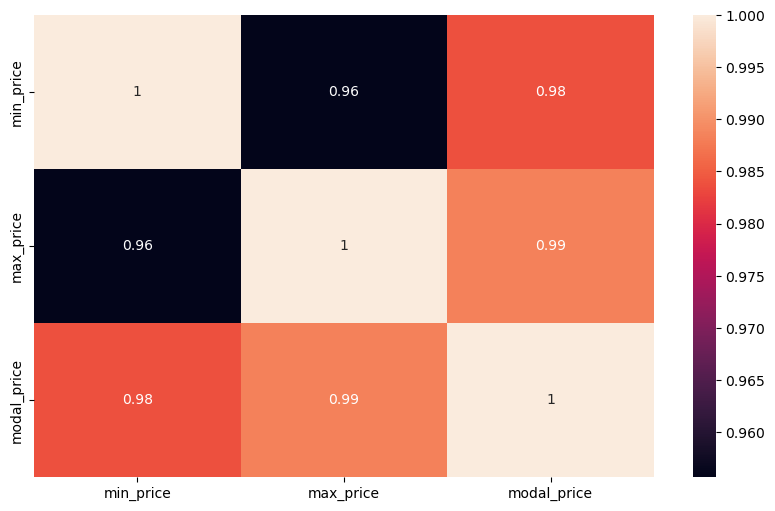

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True)

<Axes: xlabel='modal_price'>

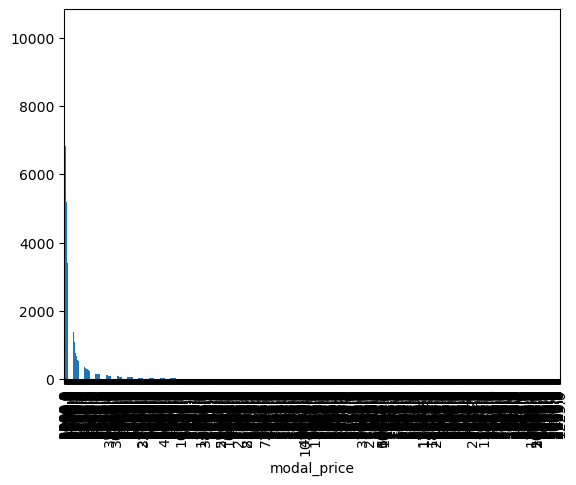

In [78]:
df.modal_price.value_counts().plot(kind='bar')
# as there are  many values and pricing is varying so we dont get aproper graph 
# As this is imbalanced

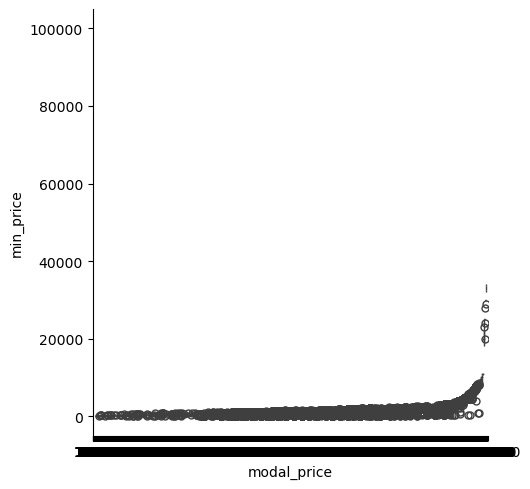

In [80]:
# catogorical plot
sns.catplot(x='modal_price',y='min_price',data=df2,kind='box')
## There are alot of outliers